# Loading Dataset from Vehicle.csv

In [1]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("ignore")

In [2]:
#importing custom python modules
import modules as winequality
import ModelEvaluation as model
import VisualizationForMisclassification as visualize
import TrainTest_Split_Traversal as train_test_split
import CrossValidationFold_Traversal as Kfolf_traversal
import CalibrationPlot as calibration_plot

In [3]:
wquality = pd.read_csv('../../../datasets/winequality.csv')

# Exploratory Data Analysis

In [4]:
wquality.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


In [5]:
winequality.dataset_statistics(wquality)

Shape of the dataset:  (4898, 13)

Features of the dataset are: 
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'recommend']

Target Labels of dataset are: 
 [False  True]


In [6]:
#Dataset Label value Count to check if the data is unbalanced
wquality['recommend'].value_counts()

False    3838
True     1060
Name: recommend, dtype: int64

Since dataset has disproportionate ratio of observations in each target class , we will be applying data resampling techniques to balance the dataset.

## DataSet Statistics 

By comapring standard deviation and mean your data points, it is observed that our data points are 
almost tend to be close to the means we have few outliers present in the dataset.

In [10]:
#to check if outliers are present in the data
wquality.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


#  Data Visualization  

## Bar Chart


BarChart for analyzing the frequency of Categorical labled class.



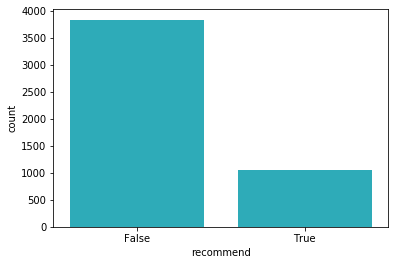

In [12]:
winequality.BarChart(wquality)

## Correlation Matrix

Correlation helps you to find out the relationship between variables. According to Correlation graph,

-  it can be observed that PH and Sulphates has a little impact on overall data. For the reason these features can be eliminated from the dataset.

Correlation Analysis



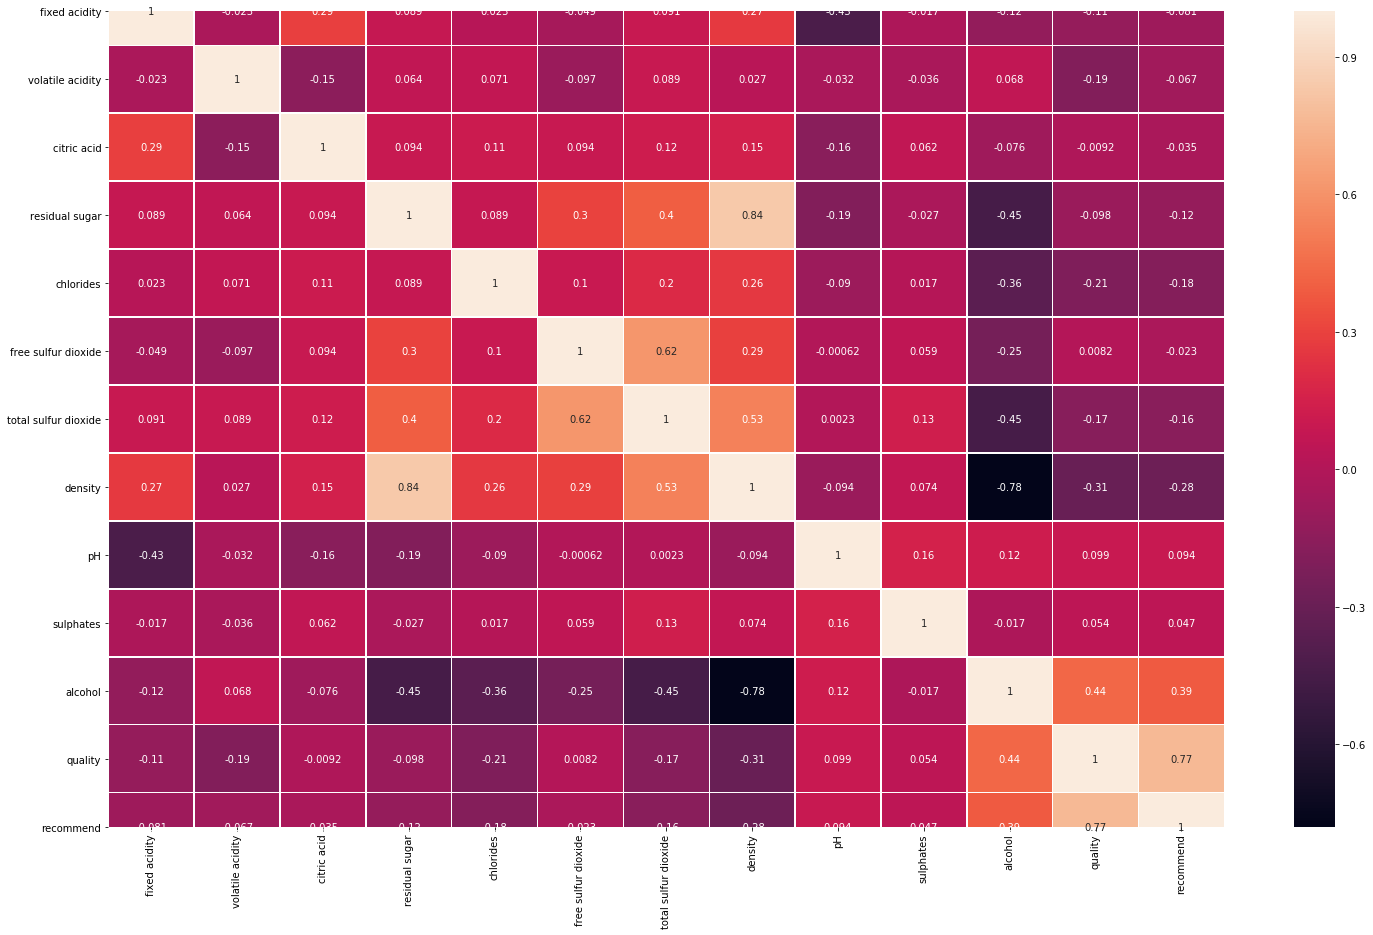

In [13]:
winequality.Correlation_matrix(wquality)

# Label Encoding

Label Encoding is used to convert the categorical labels to its numeric representation. 

In [14]:
vdataset = winequality.label_encoding(wquality)
vdataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend,recommend_code
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,0


# Model Evaluation 

Model Evaluation is done for determinig the accuracy of differnet classifiers using KFold Cross Validation.
For this Purpose Folloing classifiers are used:
    - Logistic Regression
    - K-Nearest Neighbors
    - Gausian NaiveBayes
    - Support Vector Machine
    - Random Forest

According to the graph shown below, we can compare the range and distribution of the accuracy for each model.
As shown, we can conclude that <b> Gaussian NaiveBayes </b> and <b> Support Vector Machine </b> performance will be better as compare to other classifiers. For this dataset we will be using <b>Gaussian NaiveBayes </b>

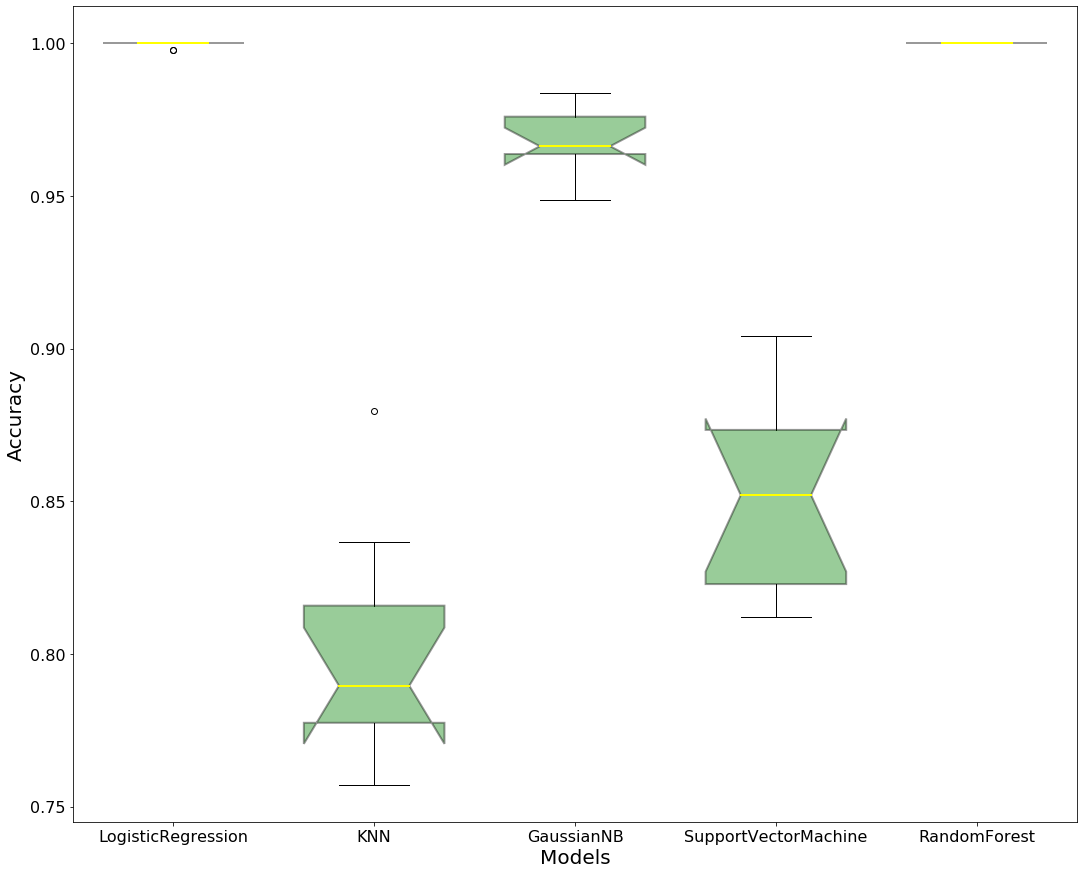

In [15]:
model.Evaluation_model(vdataset)

# Training Model

Splitting the data into two set in a ratio of 70% for training set and 30% for testing set.

In [16]:
#Splitting data for training and testing
X_train, X_test, y_train, y_test = winequality.splitting_train_test_data(vdataset)

In [17]:
y_test

4225    0
4688    0
472     0
3445    1
2339    0
       ..
3624    1
1700    0
1537    0
3034    0
769     1
Name: recommend_code, Length: 980, dtype: int64

# Oversampling

In [18]:
# check new class counts
oversample = winequality.Oversampling(X_train, y_train)
oversample.recommend_code.value_counts()

1    3060
0    3060
Name: recommend_code, dtype: int64

In [19]:
oversample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend_code
709,6.2,0.470,0.21,1.0,0.044,13.0,98.0,0.99345,3.14,0.46,9.2,5,0
823,6.7,0.190,0.23,6.2,0.047,36.0,117.0,0.99450,3.34,0.43,9.6,6,0
4109,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,0
4566,8.6,0.360,0.26,11.1,0.030,43.5,171.0,0.99480,3.03,0.49,12.0,5,0
4813,5.8,0.360,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,5.9,0.370,0.32,1.6,0.029,41.0,102.0,0.98916,3.41,0.55,12.7,7,1
2663,8.0,0.130,0.25,1.1,0.033,15.0,86.0,0.99044,2.98,0.39,11.2,8,1
1243,7.1,0.440,0.37,2.7,0.041,35.0,128.0,0.98960,3.07,0.43,13.5,7,1
2799,6.7,0.160,0.37,1.3,0.036,45.0,125.0,0.98964,3.19,0.51,12.4,7,1


In [20]:
y_train = oversample.recommend_code
X_train = oversample.drop(["recommend_code"], axis=1)

# Training Model with Gaussian NaiveBayes

In [21]:
classifier = GaussianNB()

In [22]:
classifier = classifier.fit(X_train, y_train)

In [23]:
y_predict = winequality.test_classifier(classifier , X_test)

In [24]:
accuracy =  metrics.accuracy_score(y_test, y_predict)
print("Accuracy: ",accuracy*100)

Accuracy:  96.83673469387755


# Confusion Matrix

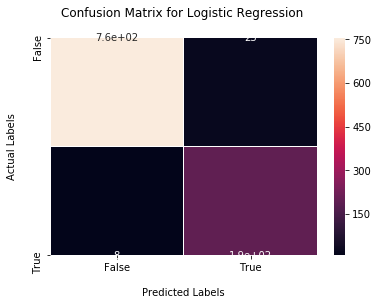

array([[755,  23],
       [  8, 194]], dtype=int64)

In [25]:
winequality.model_confusion_matrix(y_test, y_predict, vdataset)

In [26]:
winequality.model_classification_report(y_test, y_predict)


DataSet Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       778
           1       0.89      0.96      0.93       202

    accuracy                           0.97       980
   macro avg       0.94      0.97      0.95       980
weighted avg       0.97      0.97      0.97       980



# Visualization of Misclasssification

The below stacked bar chart represents the misclassified points of Gaussian NaiveBayes Classifier. It can be observed from the graph shown below that most of the point that has been misclassified belong to the <b> Class:True </b> but has been misclassified as <b> Class:False </b>. Therefore, we can conclude that apart from the high accuracy the model is not good as it is misclassification ratio is not good. We might be missing some details in the dataset. Further I would look in the dataset and try to find the problem as to why our model is overfitting the data.

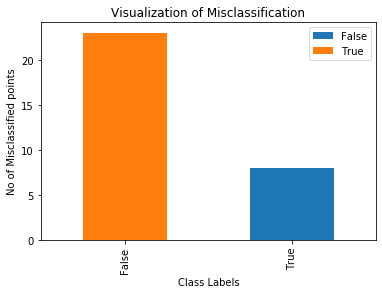

In [27]:
visualize.Misclasssification_visualization(y_test, y_predict,vdataset)

# Calibration plot

Predicting the probablity of an observation belonging to each class is more convenient than predicting of class value
direclty for classification poblems. For this we would be using Calibration Plot technique.

In [28]:
models = model.define_models()

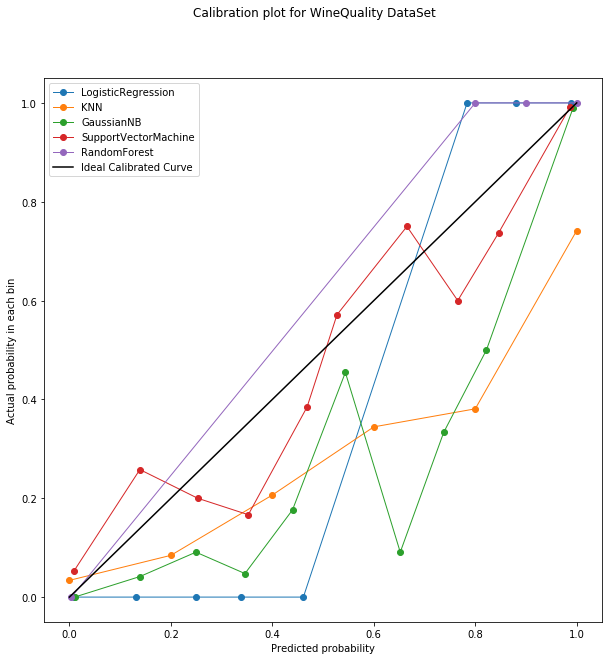

In [29]:
calibration_plot.Calibrated_Curve(models,X_train,y_train,X_test,y_test )

# Interpretaion of the plot:

For each bin, the y-value is the proportion of actual probablity, and x-value is the mean predicted probability. Therefore, a well-calibrated model has a calibration curve that hugs the straight line y=x.


According to the above graph, it can be concluded that

- Out of all these graphs <b> Support Vector Machine </b> model would be the good fit for this dataset as most of the data points are not fit but close to the to the ideal calibrated line unlike NaiveBayes as the binned poinnts are much far away from the mean predicted probablities.